In [126]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
# Read in data
data = pd.read_csv('Iris.csv')

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


In [128]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:120, 1:-1].values
x_test = data.iloc[120:, 1:-1].values

x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(4, 120)
x_test = x_test.reshape(4, 30)

In [129]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train = data.iloc[:120, -1].values
y_test = data.iloc[120:, -1].values

# Convert y-data into T/F - Note: "Iris-setosa" is T, rest are false
y_train = [ele == 'Iris-setosa' for ele in y_train]
y_test = [ele == 'Iris-setosa' for ele in y_test]

# Reshaping for matrix use (i.e. eliminates (120, ))
y_train = (np.array(y_train)).reshape(1, 120)
y_test = (np.array(y_test)).reshape(1, 30)

In [130]:
# n is number of features
n = x_test.shape[0]

# randomly initialize weights and biases
w = np.random.rand(1, n)
b = np.random.rand(1)

In [131]:
# y_hat function gives prediction
def y_hat(weights, bias, x):
    sigmoid = (1/(1+np.exp(-(weights.dot(x) + bias))))
    return sigmoid

In [132]:
# Compute total binary cross entropy (log loss)
def log_loss(y, y_pred):
    loss = np.average(-1 * y * np.log(y_pred) - (1-y) * np.log(1 - y_pred))
    return loss

y_pred = y_hat(w, b, x_train)
log_loss(y_train, y_pred)

1.0961718237160818

In [133]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[0]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  (1/numData) * np.sum(error)

    return gradientDict

y_pred = y_hat(w, b, x_train)
findGradients(x_train, y_train, y_pred)

{'gradWeights': array([[3.38065898],
        [4.97268456],
        [6.28078456],
        [0.37103741]]),
 'gradBias': 9.678253535548194}

In [134]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate):
    for i in range(max_iter): 
        y_pred = y_hat(weights, bias, x)

        gradients = findGradients(x, y, y_pred)

        # Compute gradient descent
        weights = weights - ((learning_rate * gradients["gradWeights"]).transpose())
        bias = bias - ((learning_rate * gradients["gradBias"]).transpose())

        # Not required - meant to visualize model's performance
        loss = log_loss(y, y_pred)
        losses.append(loss)

    return weights, bias

In [135]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=15, learning_rate=0.05)

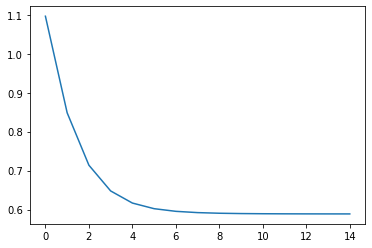

In [136]:
plt.plot(losses)

In [137]:
# Accuracy check
y_pred = y_hat(w, b, x_test)
np.sum((y_pred > 0.5) == y_test)/30*100

53.333333333333336